# Python Machine Learning Pipeline

The best way to learn machine learning is by designing and completing small projects.

A machine learning project may not be linear, but it has a number of well known steps:
+ Define Problem.
+ Prepare Data.
    - Check Python and SciPy platform (scipy, numpy, matplotlib or seaborn, pandas, scikit-learn)
    - Load the dataset.
    - Summarize the dataset.
    - Visualize the dataset.
+ Evaluate Algorithms.
+ Improve Results.
+ Present Results.

## 1. Define Problem
+ Determine the iris plant given sepal length/width and petal length/width of its flower.
+ This is a multinomial classification problem.
+ All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.

## 2. Prepare Data

### Import libraries

In [27]:
# Check the versions of libraries

import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
print('numpy: {}'.format(numpy.__version__))

import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

import seaborn
print('seaborn: {}'.format(seaborn.__version__))

import pandas
print('pandas: {}'.format(pandas.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

# Load libraries
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%matplotlib inline

Python: 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
scipy: 0.18.1
numpy: 1.11.1
matplotlib: 1.5.3
seaborn: 0.7.1
pandas: 0.18.1
sklearn: 0.17.1


### Load dataset

In [28]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
dataset = pandas.read_csv(url, names=names)

### Summarize dataset

In [29]:
# Dimensions of dataset (rows,cols)
dataset.shape

(150, 5)

In [30]:
# Peek at data
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [31]:
dataset.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [32]:
# Statistical data summary
dataset.describe()

# All of the numerical values have the same scale (cm) and similar
# ranges between 0 and 8 cm.
# Hence no data scaling is required.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
# Class distribution
dataset.groupby(dataset['class']).size()

# Each class has same number of instances (50 or 33% of the dataset)

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Visualize dataset
Two types of plots:
+ Univariate plots to better understand each attribute.
+ Multivariate plots to better understand the relationships between attributes.

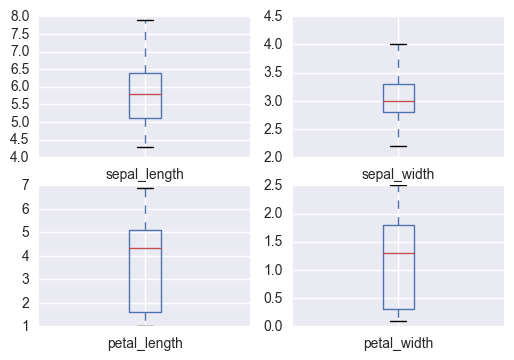

In [34]:
# Univariate plot: box and whisker
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
matplotlib.pyplot.show()

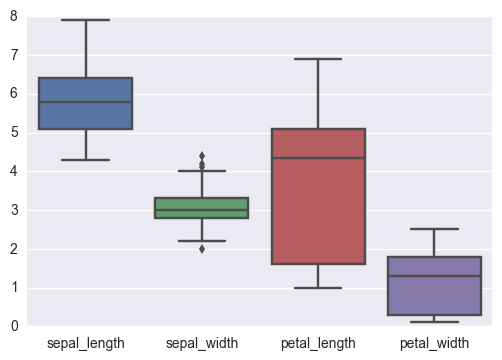

In [40]:
seaborn.boxplot(data=dataset)

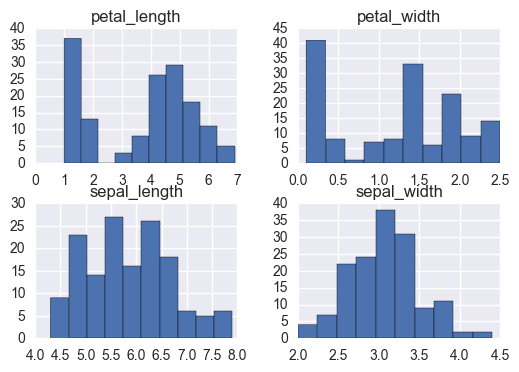

In [41]:
# Univariate plot: histogram
dataset.hist(); matplotlib.pyplot.show()

# sepal_length and sepal_width seem to have Gaussian distribution.
# This is useful to note as we can use algorithms that can exploit this assumption.

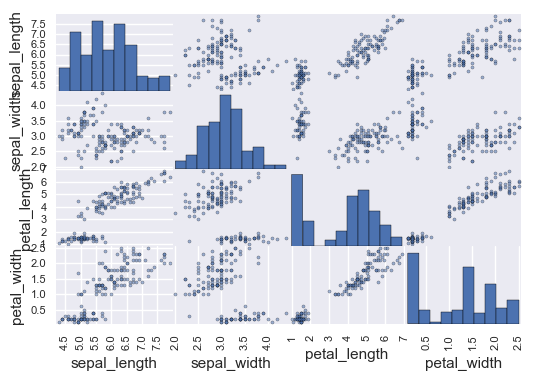

In [50]:
# Multivariate plot: scatter plot
scatter_matrix(dataset); matplotlib.pyplot.show()

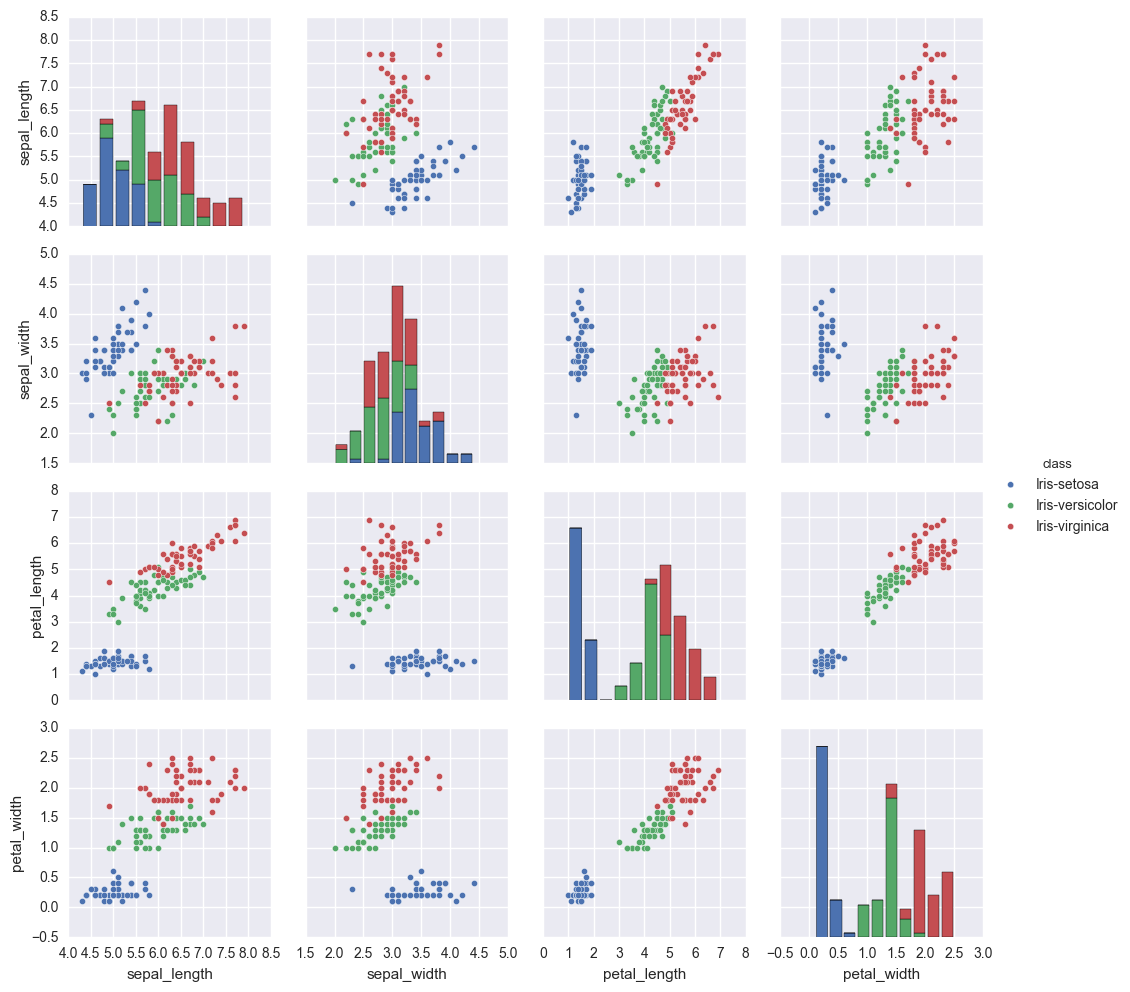

In [52]:
seaborn.pairplot(data=dataset,hue='class')

## 3. Evaluate Algorithms

### Split dataset into train and test sets

In [56]:
# X=features, y=labels
array = dataset.values
X = array[:,0:4] # first 4 columns contain features - matrix
y = array[:,4] # fifth column contain labels - vector

# split size: 80/20, 75/25
test_size = 0.20
seed = 7

# split dataset
X_train, X_test, y_train, Y_test = cross_validation.train_test_split(X, y, test_size=test_size, random_state=seed)

### Test harness

In [57]:
# k-fold cross validation
# This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.
num_folds=10
num_instances=len(X_train)

# We are using the metric of ‘accuracy‘ to evaluate models. 
# This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset
# multiplied by 100 to give a percentage (e.g. 95% accurate).
scoring='accuracy'